# Part I - (Prosper Loan Exploration) 
### (Adewunmi Oluwaseun Asegun)

## Introduction
The Loan dataset is a dataset from Prosper Loans, a San Francisco California based company in the peer-to-peer lending industry. In this projects i will be exploring loan data containing over 113,000 observations and 81 variables, some of the notable information provided for each borrower includes;

`Loan Amount` - The origination amount of the loan.  
`Listing Category` - This represents reason for taking the loan.   
`Borrower's income` - The monthly income the borrower stated at the time the listing was created.  
`Income Range` - Representing a range of earnings in which the borrowers are classified.  
`Employment Status` - The employment status of the borrower at the time they posted the listing.

As earlier stated i will be exploring variables of interests in this project to explore and detect patterns and relationships in this dataset and thereafter summarize my findings.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#read in the loan dataset
prosper_loan = pd.read_csv('prosperLoanData.csv')
prosper_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


Now that we have loaded in our dataset, we can proceed to view the structure of our dataset, confirm it is in the right format and pick out variables of interest.

In [3]:
#View dataset structure
print(prosper_loan.shape)
print(prosper_loan.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

In [4]:
#check for duplicates
prosper_loan.duplicated().sum()

0

### Data Quality Issues

We find that all the dates are not in the right format, we correct this before we proceed. 

In [5]:
#create a list of dates in the dataset
dates = ['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate']

#loop through the list to convert each object to datetime
for date in dates:
    prosper_loan[date] = pd.to_datetime(prosper_loan[date])

### Features of interest

There are a couple of interesting variables here to explore and investigate to try to understand the main drivers of loan, the demography and/or behaviour of borrowers.

The main features in the dataset that can support this investigation include. 
`IncomeRange`,  `BorrowerState`, `EmploymentStatus`, `Occupation` to mention a few.

I would proceed to pick out my features of interest and drop the other columns from our analysis

In [6]:
#select variables of interest into a dataframe
loan = prosper_loan[['BorrowerState', 'Occupation', 'EmploymentStatus', 'DebtToIncomeRatio','ListingCategory (numeric)',
                     'IsBorrowerHomeowner','CreditScoreRangeLower', 'CreditScoreRangeUpper','LoanOriginationDate',
                     'LoanOriginalAmount', 'IncomeRange', 'Term']]

In [7]:
#check structure
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   BorrowerState              108422 non-null  object        
 1   Occupation                 110349 non-null  object        
 2   EmploymentStatus           111682 non-null  object        
 3   DebtToIncomeRatio          105383 non-null  float64       
 4   ListingCategory (numeric)  113937 non-null  int64         
 5   IsBorrowerHomeowner        113937 non-null  bool          
 6   CreditScoreRangeLower      113346 non-null  float64       
 7   CreditScoreRangeUpper      113346 non-null  float64       
 8   LoanOriginationDate        113937 non-null  datetime64[ns]
 9   LoanOriginalAmount         113937 non-null  int64         
 10  IncomeRange                113937 non-null  object        
 11  Term                       113937 non-null  int64   

## Univariate Exploration

In this section, we will investigate distributions of individual variables, to define and summarize it to detect patterns present in it.

### Question 

Which State has the highest/lowest number of borrowers, and could the BorrowerState possibly play an important role in people taking loans?

### Visualization

In [8]:
# Create a function to define figsize
def fig_size(a,b):
    # Set figsize parameters
    return plt.figure(figsize=(a,b))

# Create a function to label charts
def chart_label(a,b,c):
    """
    This function takes in three arguments a, b, c
    --------
    To be used to name chart axis and titles by inputing appropriate arguments
    """
    return plt.title(a),plt.xlabel(b),plt.ylabel(c)

#Set base color to be used all through the notebook
base_color = sns.color_palette()[0]

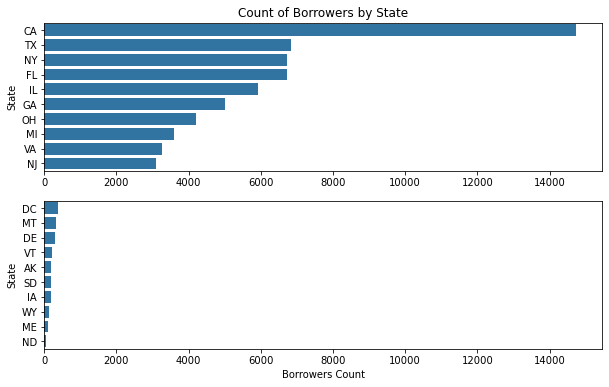

In [9]:
fig_size(10,6)

ax1 = plt.subplot(2, 1, 1)
state_order = loan.BorrowerState.value_counts().iloc[:10].index
sns.countplot(data= loan, y= 'BorrowerState', color= base_color, order= state_order)
chart_label('Count of Borrowers by State', '', 'State');

ax2 = plt.subplot(2, 1, 2, sharex= ax1)
state_order = loan.BorrowerState.value_counts().iloc[41:].index
sns.countplot(data= loan, y= 'BorrowerState', color= base_color, order= state_order)
chart_label('', 'Borrowers Count', 'State');

### Observation

We see that California is the state with the highest borrowers and it has over two times the state (Texas) in second place, likewise North Dakota has the least number of borrowers with Wyoming and Maine also in the bottom 3.

### Question

What is the employment status of the borrowers and how is it distributed?

### Visualization

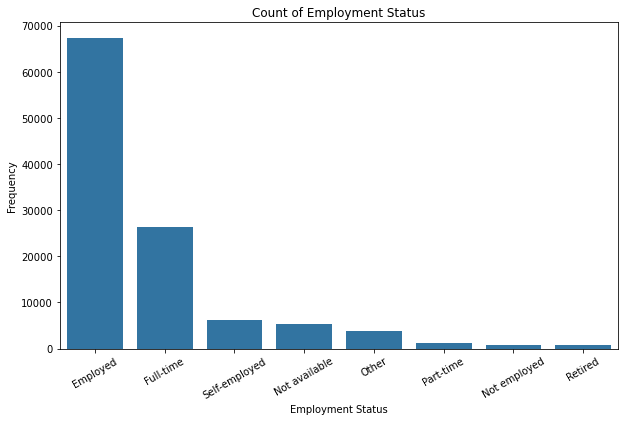

In [10]:
fig_size(10,6)
employed_order = loan.EmploymentStatus.value_counts().index
sns.countplot(data= loan, x= 'EmploymentStatus', color= base_color, order= employed_order)
chart_label('Count of Employment Status','Employment Status', 'Frequency')
plt.xticks(rotation= 30);

### Observation

Suprisingly, the visuals reveals that people who are actively employed and with full-time roles are those who are taking more of the loans not the self-employed who might have been thought to need it to grow or invest in their business or the unemployed who might be looking to start something out.

### Question

Why are people taking the loans, and what reasons are they giving for taking these loans?

### Visualization

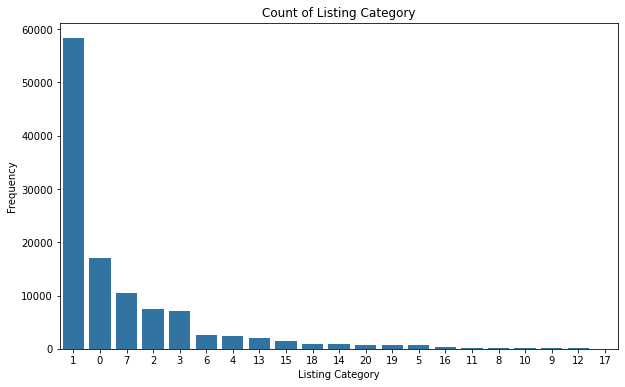

In [11]:
fig_size(10,6)
listing_order = loan['ListingCategory (numeric)'].value_counts().index
sns.countplot(data= loan, x= 'ListingCategory (numeric)', color= base_color, order= listing_order)
chart_label('Count of Listing Category','Listing Category', 'Frequency');

### Observation

According to our data dictionary:  
The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

This shows Debt consolidation is the main reason people take loans, i.e people take loans to finance existing loans, another significant reason is Home improvement and Business which are not so far apart from each other.


### Question

What do these borrowers do? The occupation of the borrowers (Top 15)

### Visualization

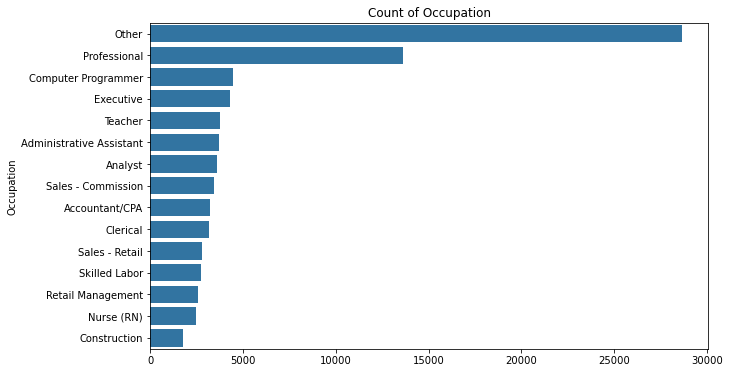

In [12]:
fig_size(10,6)
occupation_order = loan.Occupation.value_counts().iloc[:15].index
sns.countplot(data= loan, y= 'Occupation', color= base_color, order= occupation_order)
chart_label('Count of Occupation','', 'Occupation');

### Observation

I have filtered out the visual to top 15, we find that the highest category is "other", but the main leading category are professionals and computer programmers. Interestingly Executives happen to be in the top 5 category.

### Question 

1. What time/month of the year do borrowers mostly opt for loans? 
2. What has the trend of borrowers looked like overtime, has it increased or decreased?
### Visualization

In [13]:
#Extract and create new month and year column from the LoanOriginationDate
loan['month'] = loan['LoanOriginationDate'].apply(lambda x: x.strftime('%Y-%m-%d').split('-')[1])
loan['year'] = loan['LoanOriginationDate'].apply(lambda x: x.strftime('%Y-%m-%d').split('-')[0])

C:\Users\user\anaconda3\envs\Data\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\envs\Data\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


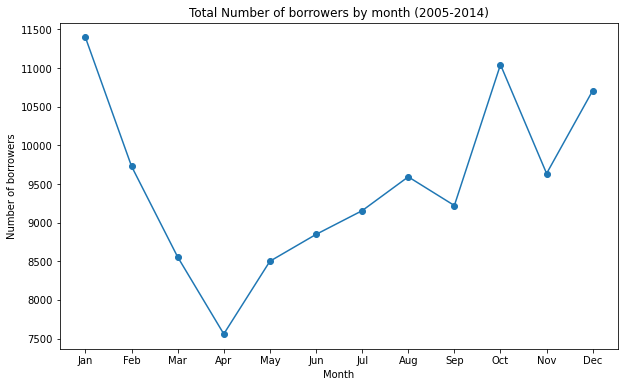

In [14]:
months = loan.month.value_counts().sort_index()
fig_size(10,6)
plt.plot(months, marker= 'o')
plt.xticks(['01','02','03','04','05','06','07','08','09','10','11','12'],
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
chart_label('Total Number of borrowers by month (2005-2014)','Month','Number of borrowers');

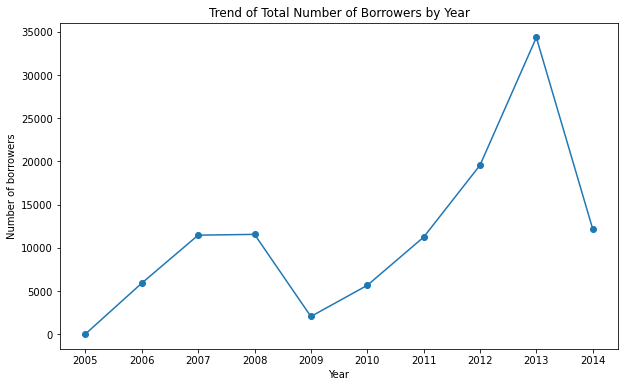

In [15]:
years = loan.year.value_counts().sort_index()
fig_size(10,6)
plt.plot(years, marker= 'o')
chart_label('Trend of Total Number of Borrowers by Year','Year','Number of borrowers');

### Observation

Over the years(2005-2014) The beginning and end of the year marks the time borrowers mostly opt for loans with January, October and December amongst the top months

For total number of borrowers 2005-2007 marked a consistent increase in total number of borrowers, 2008-2009 also marked a consistent decrease before witnessing an upward trend till 2013 where it peaked, before suffering a tremendous drop in 2014 because the year is still running and in review

### Question

What does the income range of most people who take out loans look like? is a particular income range associated with loan listings?

### Visualization

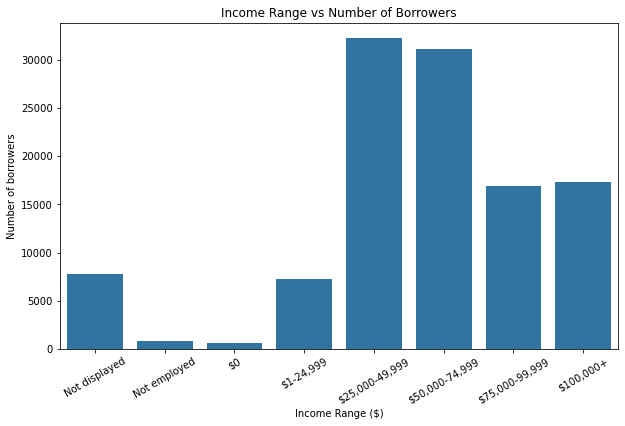

In [16]:
fig_size(10,6)
income_order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
sns.countplot(data= loan, x= 'IncomeRange', color= base_color, order= income_order)
chart_label('Income Range vs Number of Borrowers','Income Range ($)', 'Number of borrowers')
plt.xticks(rotation=30);

### Observation

It is evident that people who earn between `$25,000- $75,000` make up the largest chunk of borrowers, well this is understandable as this falls within the range of the average income earners in the U.S.
Also observed that unemployed people or people who do not have any source of income rarely take loans and this correlates with our chart on the employment status of borrowers.

### Question
Still speaking of income  

What does the distribution of our Borrowers Debt to Income ratio look like?

### Visualization

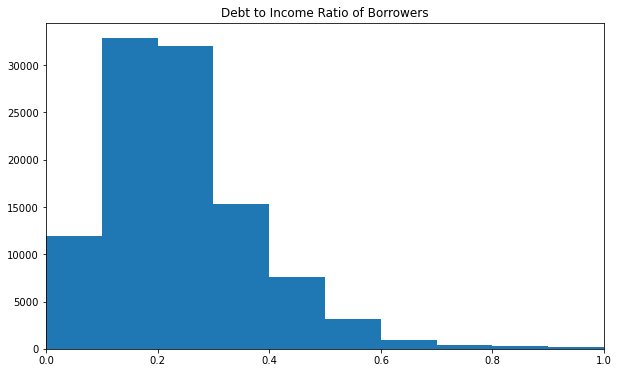

In [17]:
fig_size(10,6)
bins = np.arange(0, loan['DebtToIncomeRatio'].max()+0.1, 0.1)
plt.hist(data = loan, x= 'DebtToIncomeRatio', bins= bins)
plt.xlim(0,1)
chart_label('Debt to Income Ratio of Borrowers','','');

### Observation
For this visualization we had to zoom into our visual to get a proper idea and look of what is really going on by calling the `xlim` function
We see that the data is a little skewed to the right and the Debt to Income Ratio of most of our borrowers is concentrated between 10%-30%

### Question
In a previous chart we saw that a leading cause of people taking loans is "Home improvement" we would like to investigate further to see the percentage of Home owners to non-Home owners.
Are Home owners taking more loans that people who do not own a house?

### Visualization

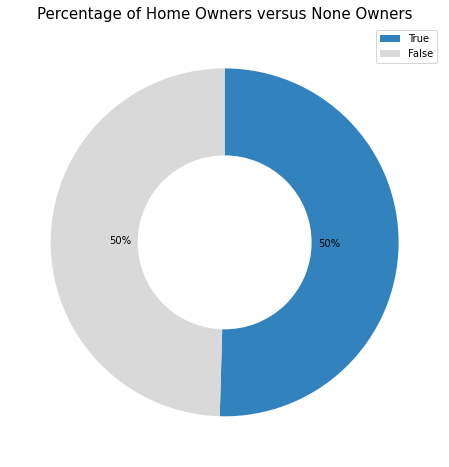

In [18]:

loan.IsBorrowerHomeowner.value_counts().plot(kind= 'pie', autopct= '%.0f%%', figsize= (10,8), startangle=90,
                                             counterclock=False, wedgeprops= {'width': 0.5}, labeldistance = None, 
                                             cmap=plt.get_cmap('tab20c'))

plt.ylabel("")
plt.legend()
plt.title('Percentage of Home Owners versus None Owners', fontsize= 15);

### Observation 

Surprisingly the visuals shows both categories are evenly distributed and there is no difference between how Home owners and None homeowners behave relating to loans.

### Question 

What is the credit worthiness of our borrowers and how likely are they to pay back?

### Visualization

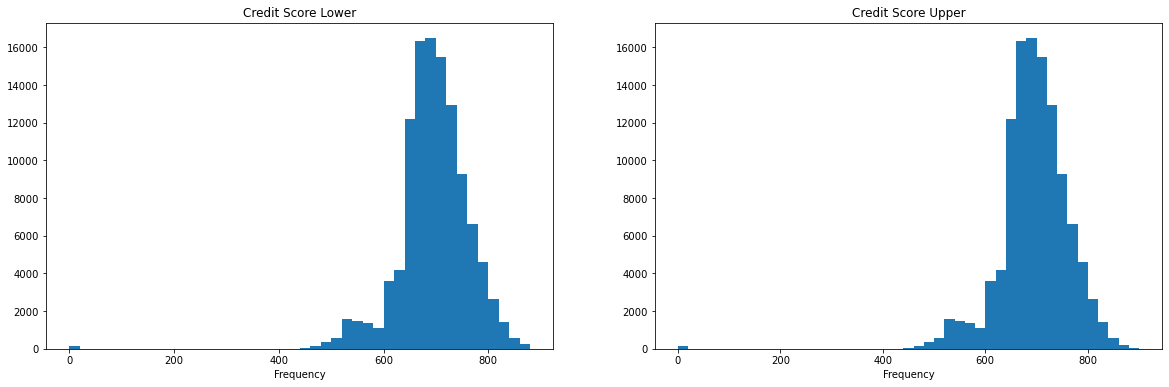

In [19]:
fig_size(20,6)

plt.subplot(1, 2, 1)
bins = np.arange(0, loan['CreditScoreRangeLower'].max()+20, 20)
plt.hist(data = loan, x= 'CreditScoreRangeLower', bins= bins)
chart_label('Credit Score Lower','Frequency','')

plt.subplot(1, 2, 2)
bins = np.arange(0, loan['CreditScoreRangeUpper'].max()+20, 20)
plt.hist(data = loan, x= 'CreditScoreRangeUpper', bins= bins)
chart_label('Credit Score Upper','Frequency','');

### Observation  

The distribution of the Upper and Lower range looks quite similar and one can see most of the borrowers fall between the range 650-750 credit score which is a good but not so excellent credit score as we consider 800+ an excellent credit score.

### Question

What is the distribution of Loan Term in the dataset?

### Visualization

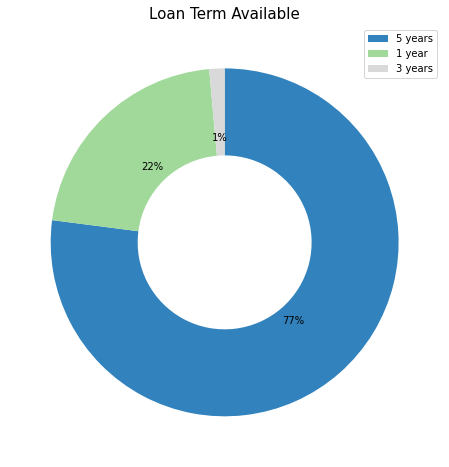

In [20]:
loan.Term.value_counts().plot(kind= 'pie', autopct= '%.0f%%', figsize= (10,8), startangle=90, 
                              counterclock=False, wedgeprops= {'width': 0.5}, labeldistance = None,
                             cmap=plt.get_cmap('tab20c'))
plt.ylabel("")
plt.legend(labels= ['5 years', '1 year', '3 years'])
plt.title('Loan Term Available', fontsize= 15);

### Observation
Most of the loans given out have a term of 5 years, the loan term is either 5 years long term or 1 year short term, medium term loans are sparsely given out with just 1%. 

### Distribution(s) in variable(s) of interest.
It was observed that people mostly take loans during the year end up until the beginning of the year when it is at it's peak and the leading cause of taking these loans is debt consolidation and home improvement.

Also interestingly we find that people who were gainfully employed where the highest borrowers instead of the self-employed.

### Operations performed on data to tidy, adjust, or change form of data? 

I also performed some transformation by creating a year and month column from the `LoanOriginationDate` column so i could easily visualize this on a line graph.

## Bivariate Exploration

### Question

Does the income of borrowers generally affect loan amount accessible to them?

### Visualization

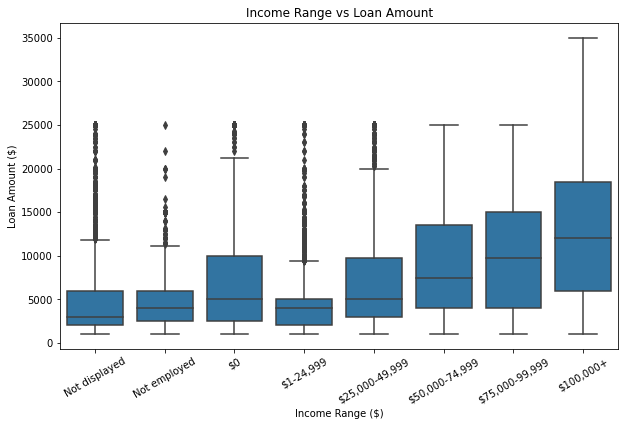

In [21]:
fig_size(10,6)
sns.boxplot(data= loan, x= 'IncomeRange', y= 'LoanOriginalAmount', color= base_color, order= income_order)
chart_label('Income Range vs Loan Amount','Income Range ($)','Loan Amount ($)')
plt.xticks(rotation=30);

### Observation

Apart from the unemployed, those who do not earn and those who do not have their data displayed, we find that there is truly a relationship between Income range and Loan amount as there is a consistent increase in the mean and percentile as income range increases.

### Question

Does the Employment status of borrowers generally affect loan amount accessible to them?

### Visualization

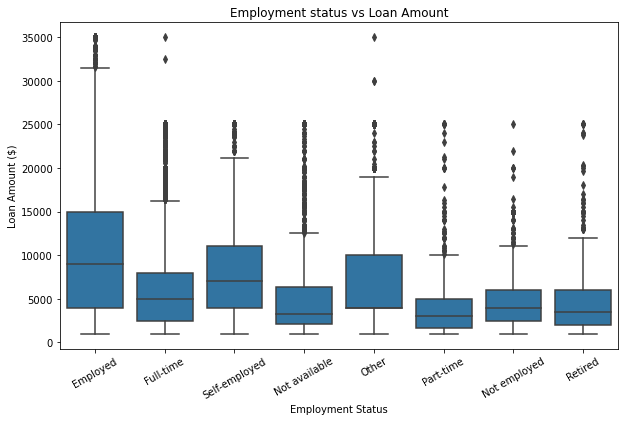

In [22]:
fig_size(10,6)
sns.boxplot(data= loan, x= 'EmploymentStatus', y= 'LoanOriginalAmount', color= base_color, order= employed_order)
chart_label('Employment status vs Loan Amount','Employment Status','Loan Amount ($)')
plt.xticks(rotation=30);

### Observation

Unsurprisingly borrowers who are employed tend to enjoy larger amounts, this could be due to the fact that majority of the borrowers fall under the category 'Employed' as earlier pointed out in a univariate visual.

### Question

What is the distribution of Home owners amongst the Income Range and employment status?

### Visualization

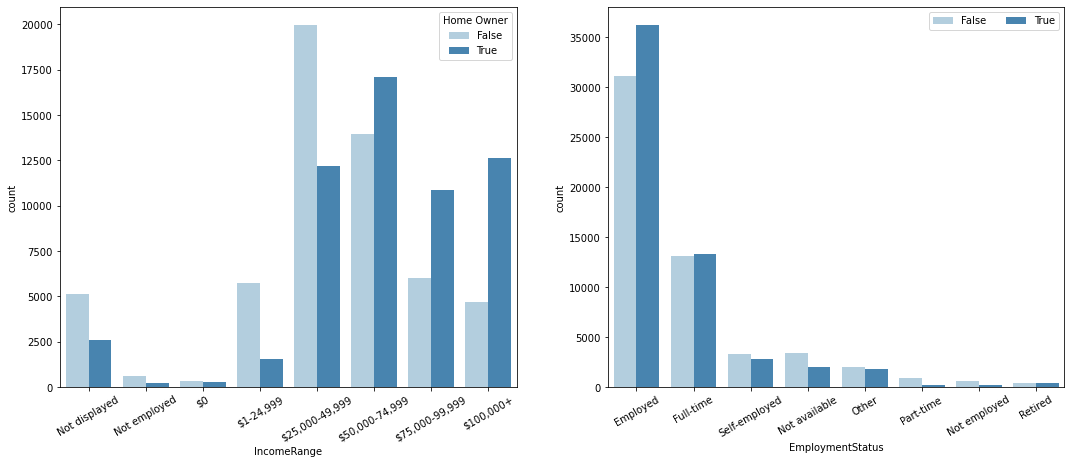

In [23]:
fig_size(18,7)


plt.subplot(1, 2, 1)
sns.countplot(data = loan, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', palette = 'Blues', order = income_order)
plt.legend(title= 'Home Owner')
plt.xticks(rotation=30)

ax = plt.subplot(1, 2, 2)
sns.countplot(data = loan, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner', palette = 'Blues', order = employed_order)
ax.legend(ncol = 2)
plt.xticks(rotation=30);

### Observation

Starting off from those who earn more i.e 100k+ we find that they are two times more likely to be Home owners and the trend generally shows that the higher the borrowers earn the more likely it is that they would be a Home owner, likewise the lesser the borrower earns the less likely it is they would be a Home owner.

While there is really no significant difference in the distribution of homeowners amongst employment status we still observe that borrowers who are gainfully employed tend to be home owners than their other counterparts

## Multivariate Exploration


### Question

Is there a difference between the loan amount accessible to Home owners and None owners across the same income range?

### Visualization

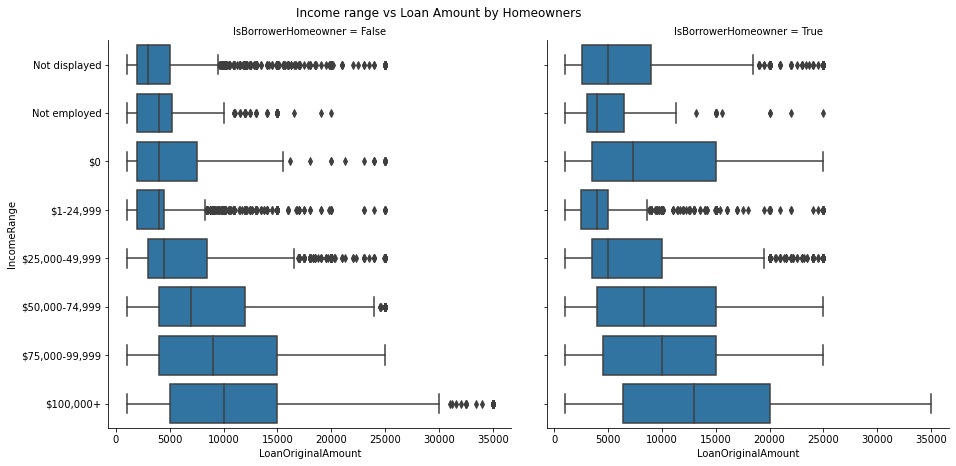

In [24]:
g= sns.FacetGrid(data= loan, col = 'IsBorrowerHomeowner', height = 4)
g.map(sns.boxplot, 'LoanOriginalAmount', 'IncomeRange', order = income_order)
plt.suptitle('Income range vs Loan Amount by Homeowners')
g.fig.set_size_inches(15,7);

### Observation

One interesting observation would be that home owners who do not earn anything can access higher amount of loans compared to None owners, it doesn't only stop there, generally Home owners are doing better and fairly so across all Income range.

### Question

Are there differences in the distribution of Loan accessible to all income range across three terms available?

### Visualization

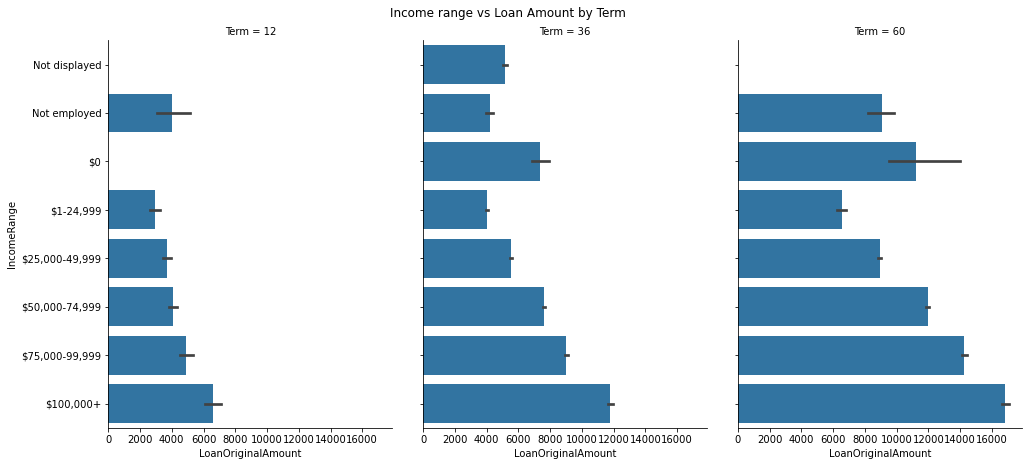

In [25]:
g= sns.FacetGrid(data= loan, col = 'Term', height = 4)
g.map(sns.barplot, 'LoanOriginalAmount', 'IncomeRange', order = income_order)
plt.suptitle('Income range vs Loan Amount by Term')
g.fig.set_size_inches(15,7);

### Observation

It is also interesting to note that people who are unemployed, or not earning still get to access loans with higher amounts and longer terms even, but the trend amongst the income range from 25k to 100k+ consistently increases as expected across the three terms.

## Conclusions
#### Summary of all findings

1. It is no surprise that California the state housing the company boasts the highest number of borrowers from the company.
2. We find that people mostly take loans when festive periods approach towards the end of the year and into the new year, and the top reasons for taking these loans is Debt consolidation and Home improvement.
3. We observe that the Debt to Income Ratio of most of the borrowers is relatively low as also their credit score range is fairly good and manageable.
4. It is also observed that this company mostly gives out long term loans as against medium terms
5. Generally there has been an uptrend in the total number of borrowers over the years from 2005, with the peak in 2013
6. We observed the average earners i.e people who earn between `$25,000- $75,000` make up the largest chunk of borrowers
7. We also found that the higher you earn the more likely it was for one to be a homeowner, starting from those who earn more i.e 100k+ it was discovered that they are two times more likely to be Home owners and the trend generally decreases from there.
8. There is a relationship between Income range and Loan amount as there is a consistent increase in the mean and percentile as income range increases.
9. Lastly we observed Home owners are doing better and fairly so across all Income range in accessing higher loan amounts.